### Time Series

Time series is a sequence of observations made over time intervals. These intervals can vary in frequency, ranging from hourly to annual, and sometimes even down to seconds or minutes for metrics like website clicks or user visits.

The analysis of time series entails examining different characteristics of the data to gain insights and make reliable forecasts for the future. By understanding the underlying patterns and trends within the series, analysts can make informed decisions and predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Downloads\multiTimeline (1).csv", skiprows=1)
df.head()

,Week,co: (Kenya),lockdown: (Kenya),hospital: (Kenya),vaccine: (Kenya)
0,2019-04-21,10,0,36,2
1,2019-04-28,9,0,28,2
2,2019-05-05,9,0,36,3
3,2019-05-12,8,0,37,2
4,2019-05-19,10,0,38,3


In [3]:
df.columns = ['week', 'covid19', 'hospital', 'vaccine', 'lockdown']
df.head()

,week,covid19,hospital,vaccine,lockdown
0,2019-04-21,10,0,36,2
1,2019-04-28,9,0,28,2
2,2019-05-05,9,0,36,3
3,2019-05-12,8,0,37,2
4,2019-05-19,10,0,38,3


In [4]:
df.dtypes

week        object
covid19      int64
hospital    object
vaccine      int64
lockdown     int64
dtype: object

In [5]:
from datetime import datetime

df['week'] = pd.to_datetime(df.week)

In [6]:
df.dtypes

week        datetime64[ns]
covid19              int64
hospital            object
vaccine              int64
lockdown             int64
dtype: object

In [7]:
df.set_index('week',inplace=True)

In [8]:
df.head()

,covid19,hospital,vaccine,lockdown
week,,,,
2019-04-21,10,0,36,2
2019-04-28,9,0,28,2
2019-05-05,9,0,36,3
2019-05-12,8,0,37,2
2019-05-19,10,0,38,3


In [9]:
dfs = df[df['hospital'] == '<1']
dfs

,covid19,hospital,vaccine,lockdown
week,,,,
2022-08-14,11,<1,41,5
2022-09-11,10,<1,46,6
2022-10-23,12,<1,45,7
2022-12-18,12,<1,42,6
2023-01-01,11,<1,46,5
2023-01-15,11,<1,46,7
2023-02-26,11,<1,49,6
2023-04-09,11,<1,46,6
2023-04-23,12,<1,47,8


In [10]:
df['hospital'] = df['hospital'].replace('<1',0)
df['lockdown'] = df['lockdown'].replace('<1',0)


In [11]:
df.dtypes

covid19      int64
hospital    object
vaccine      int64
lockdown     int64
dtype: object

In [12]:
df['hospital'] = df['hospital'].astype(int)

In [13]:
df.dtypes

covid19     int64
hospital    int32
vaccine     int64
lockdown    int64
dtype: object

## Checking trend of covid19 search on google over time

We will use the average of the last 12 data points to check the trend. We will use a technique called rolling average.

A simple rolling average (also called a moving average) is the unweighted mean of the last n values.

Text(0.5, 0, 'Year')

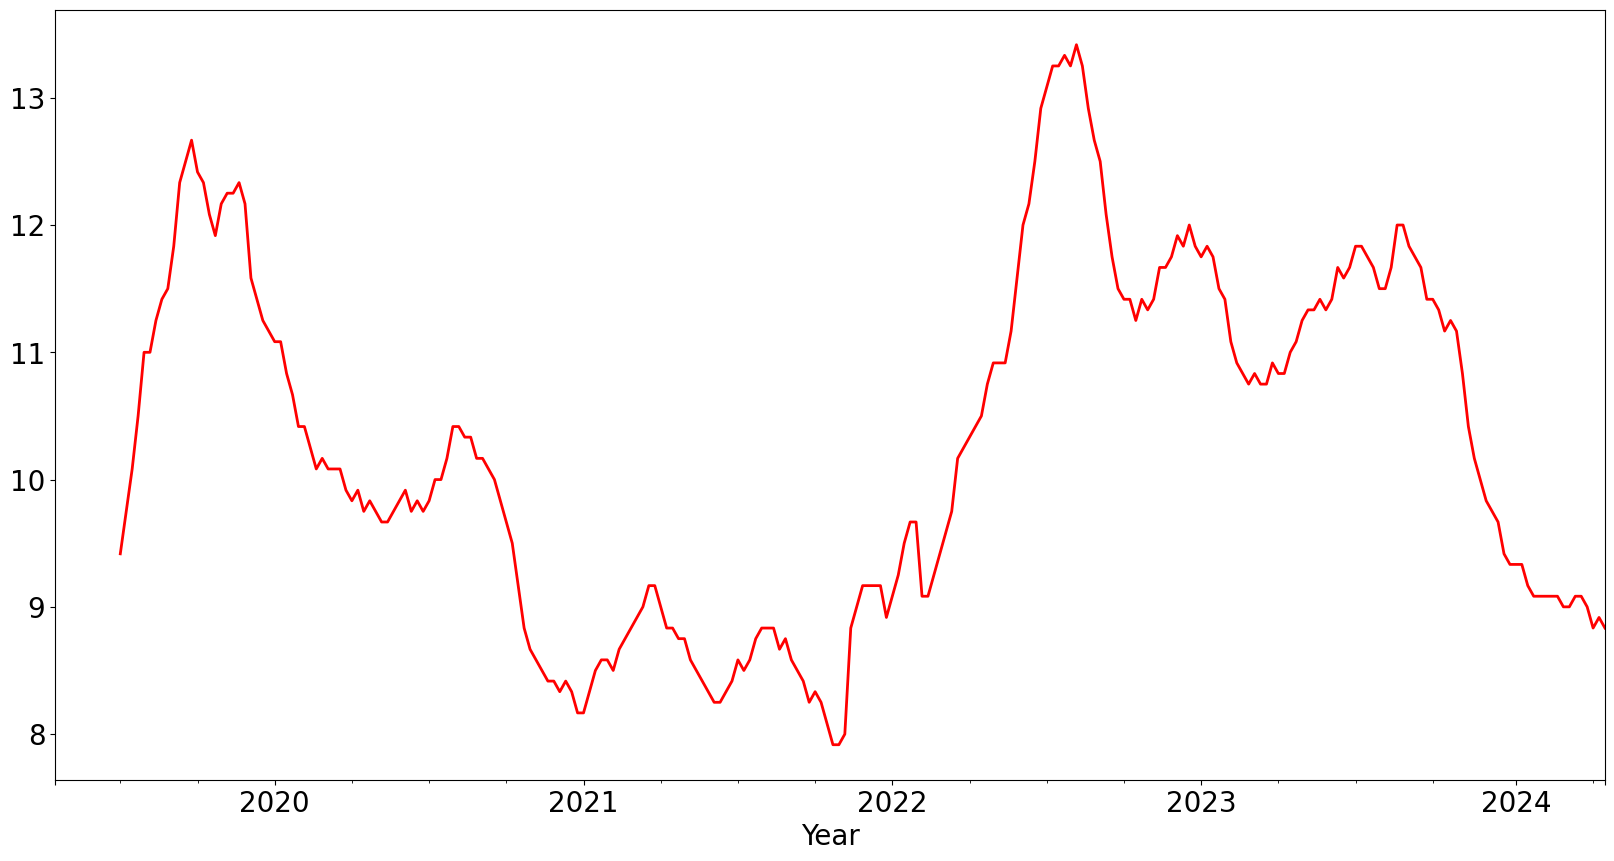

In [14]:
covid = df['covid19']
covid.rolling(12).mean().plot(figsize = (20,10),linewidth=2,fontsize=20,color='red')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

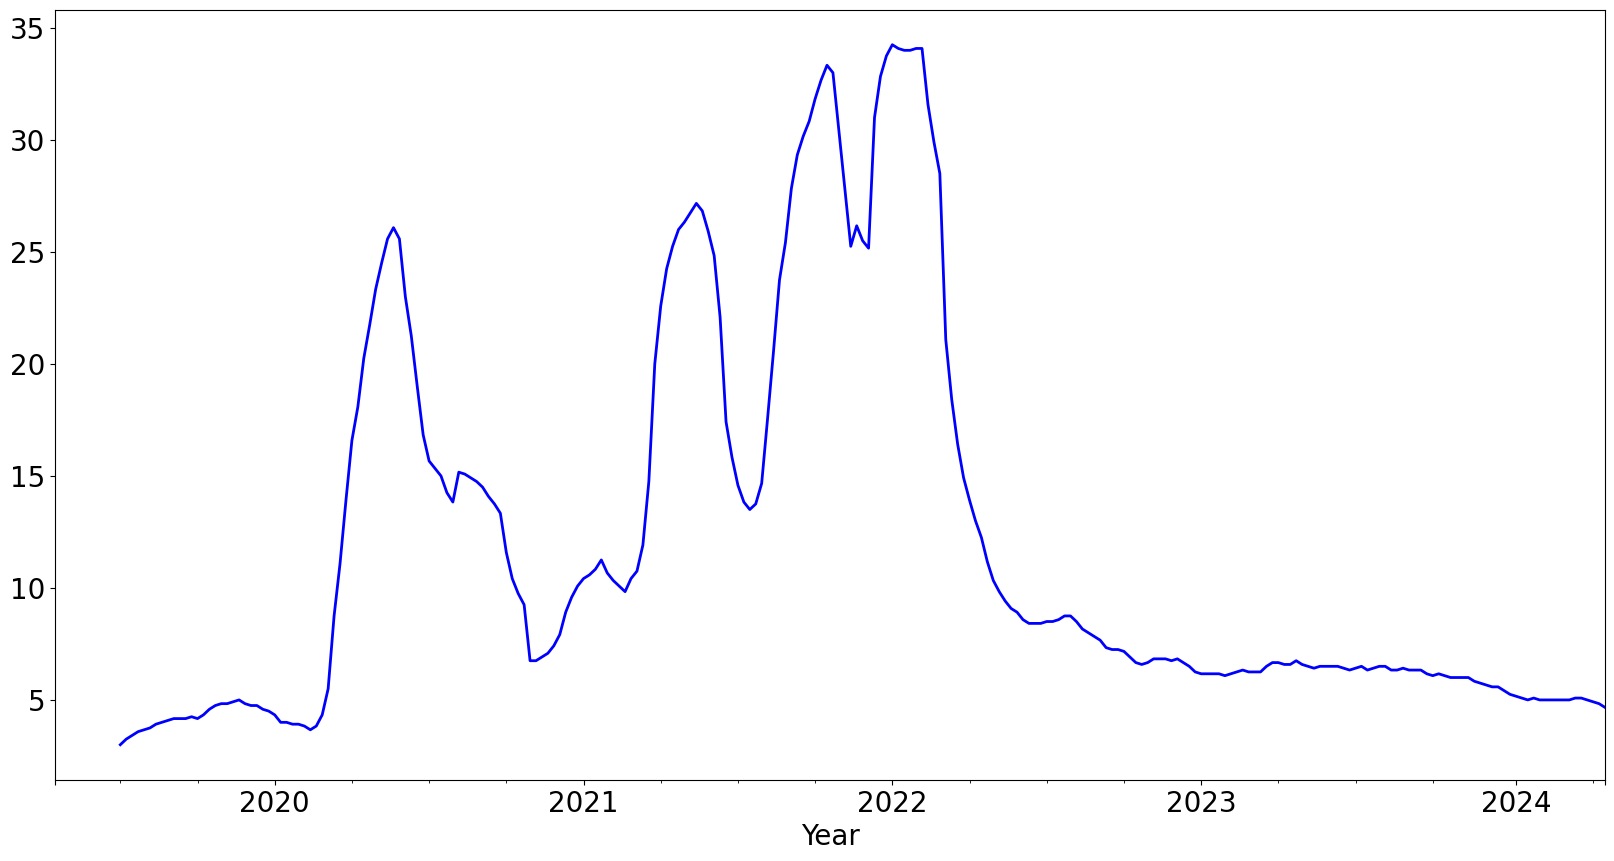

In [15]:
## for lockdown

covid_lockdown = df['lockdown']
covid_lockdown.rolling(12).mean().plot(figsize = (20,10),linewidth=2,fontsize=20,color='blue')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

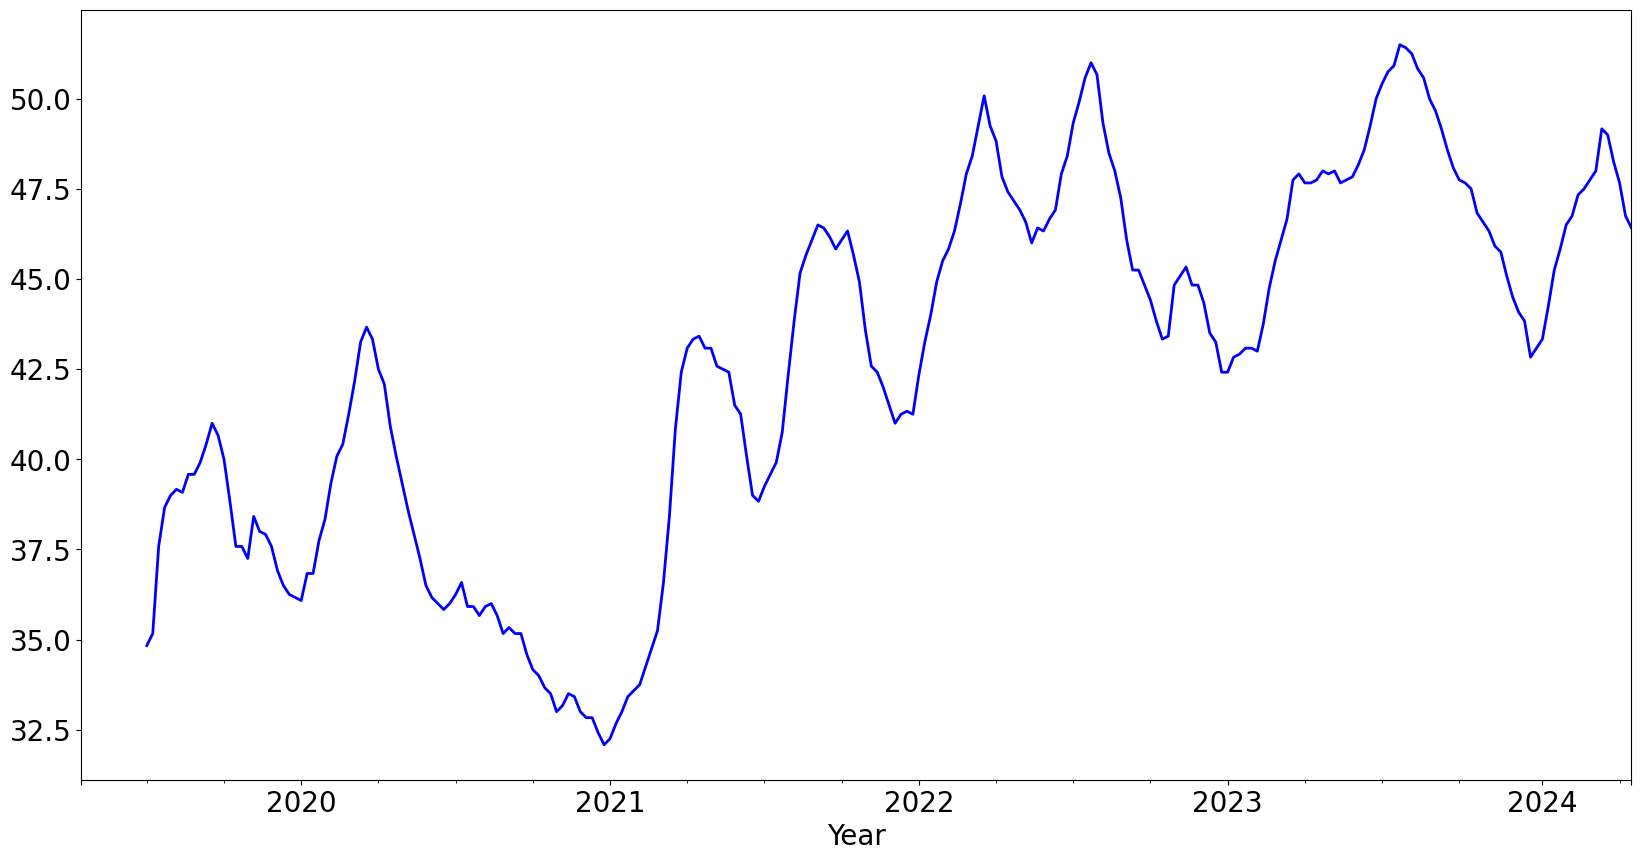

In [16]:
## for vaccine

covid_vaccine = df['vaccine']
covid_vaccine.rolling(12).mean().plot(figsize = (20,10),linewidth=2,fontsize=20,color='blue')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

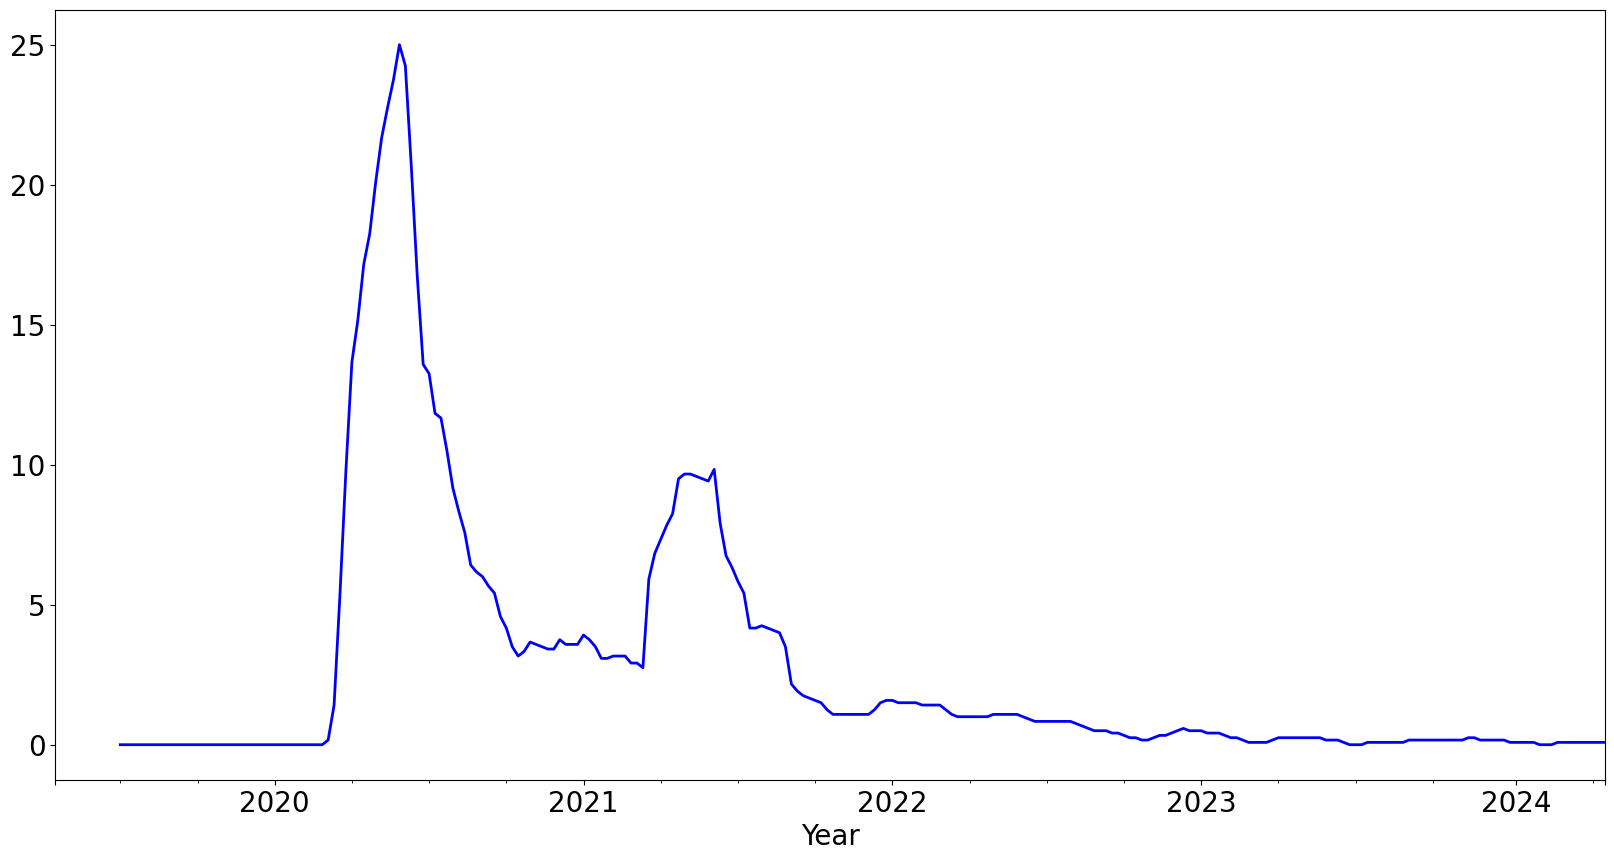

In [17]:
## for hospital

covid_hospital = df['hospital']
covid_hospital.rolling(12).mean().plot(figsize = (20,10),linewidth=2,fontsize=20,color='blue')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

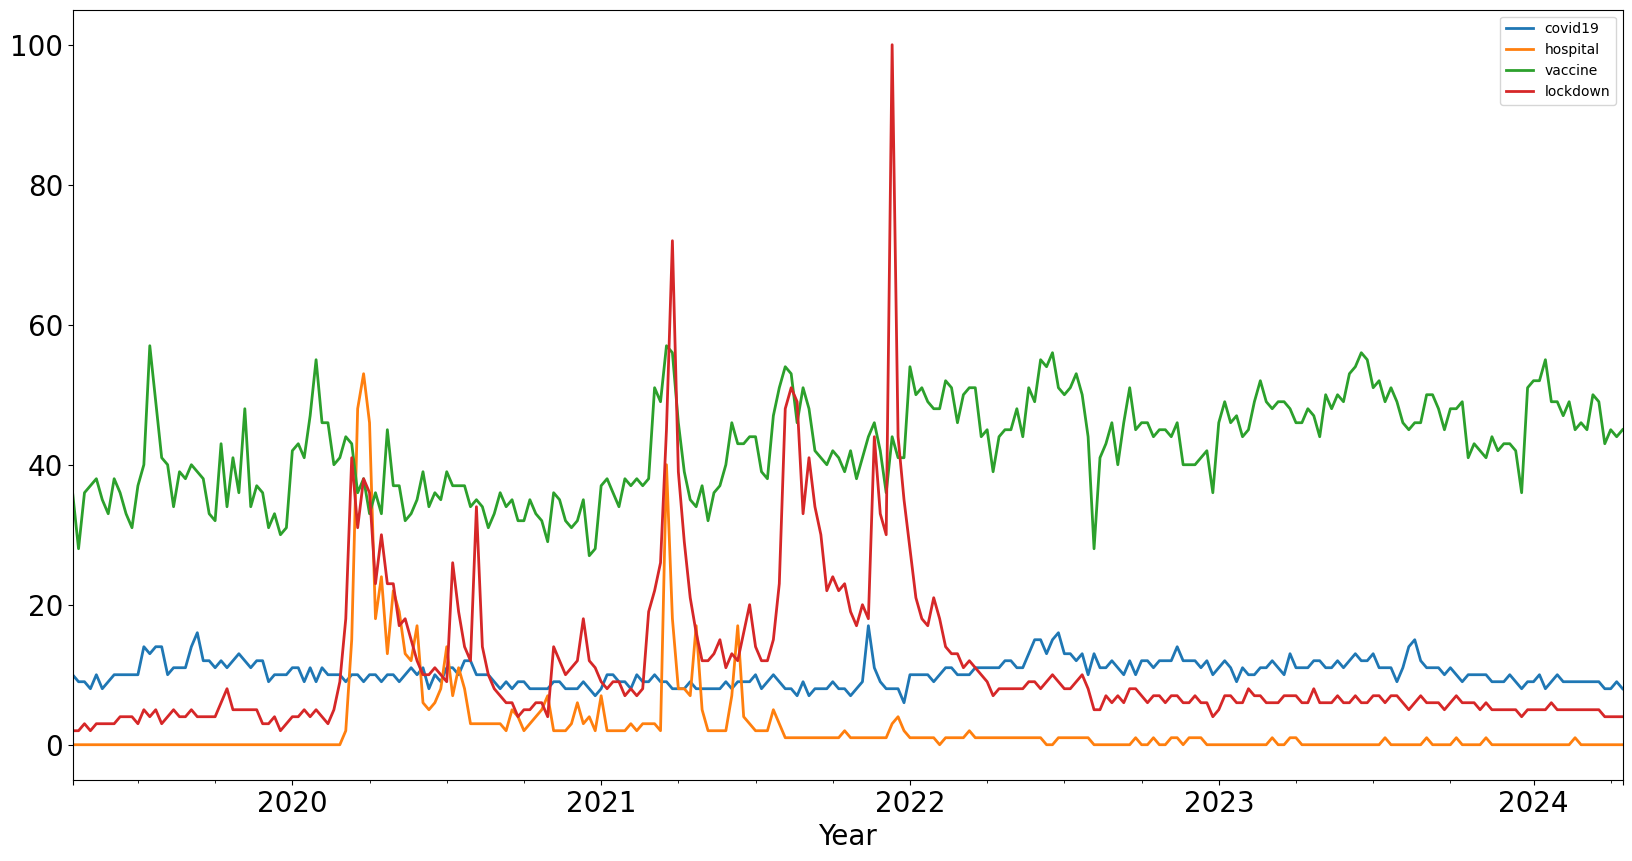

In [18]:
df.plot(figsize=(20,10),linewidth=2,fontsize=20)
plt.xlabel('Year',fontsize=20)

## Seasonal Patterns in Time Series Data
One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend you can use what is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'hospital' Series:

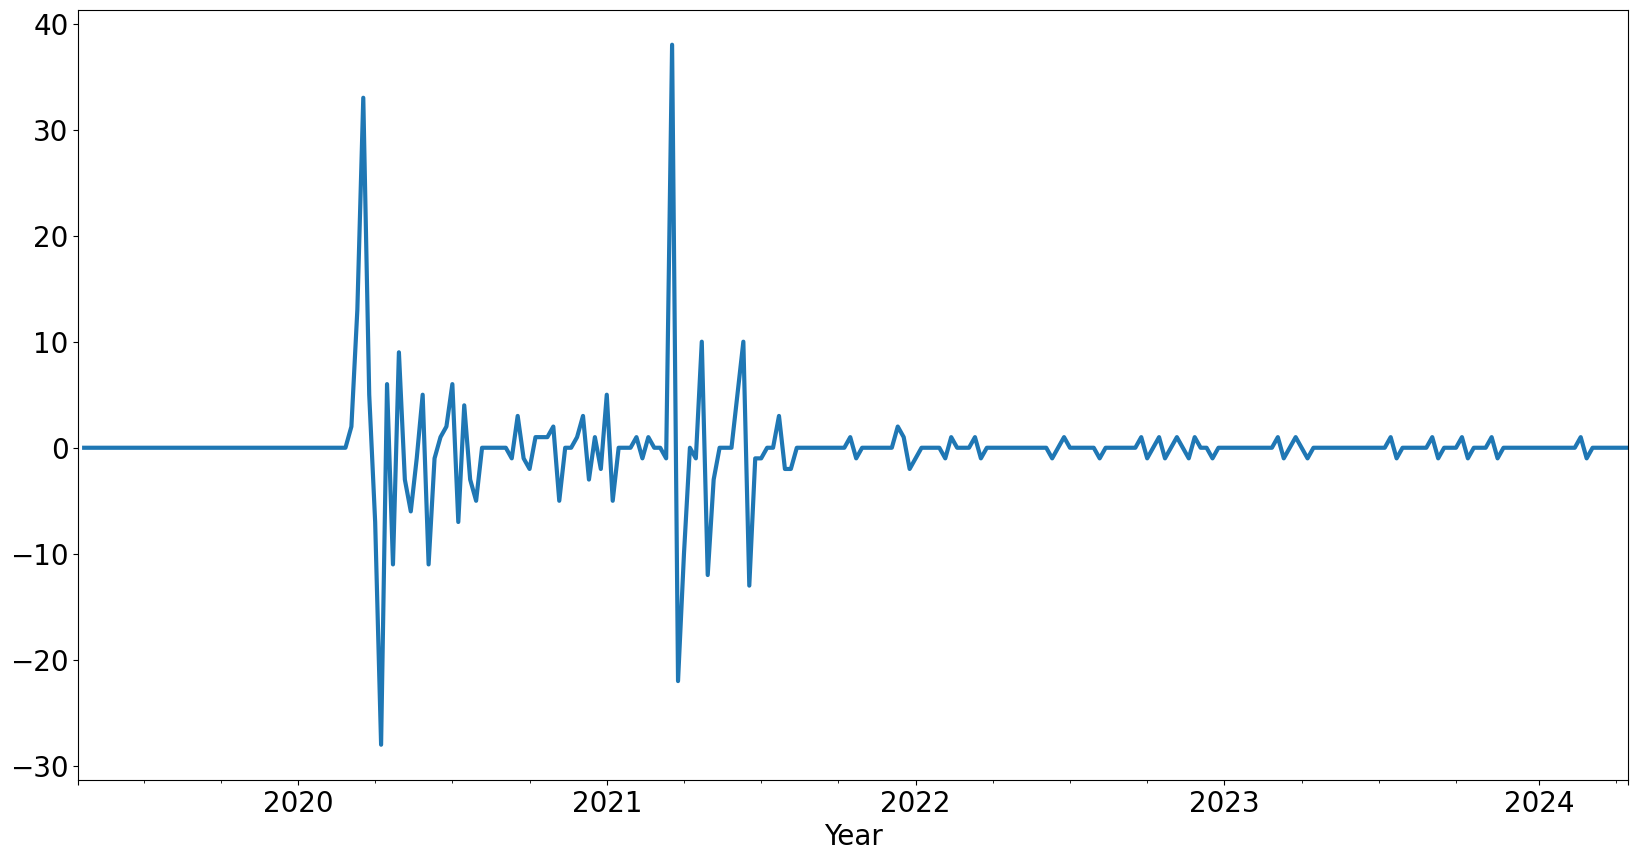

In [19]:
covid_hospital.diff().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Correlation

It's a statistical measure that describes the extent to which two variables change together. It quantifies the relationship between two variables and ranges from -1 to 1. With 1 being a perfect correlation: directly proportional and -1 inversely proportional.

In [20]:
df.corr()

,covid19,hospital,vaccine,lockdown
covid19,1.000000,-0.172981,0.310666,-0.332330
hospital,-0.172981,1.000000,-0.187761,0.430933
vaccine,0.310666,-0.187761,1.000000,0.095783
lockdown,-0.332330,0.430933,0.095783,1.000000


We can see from the correlation matrix that lockdown and hospital are highly correlated at 0.43 followed by vaccine and covid19 with 0.31

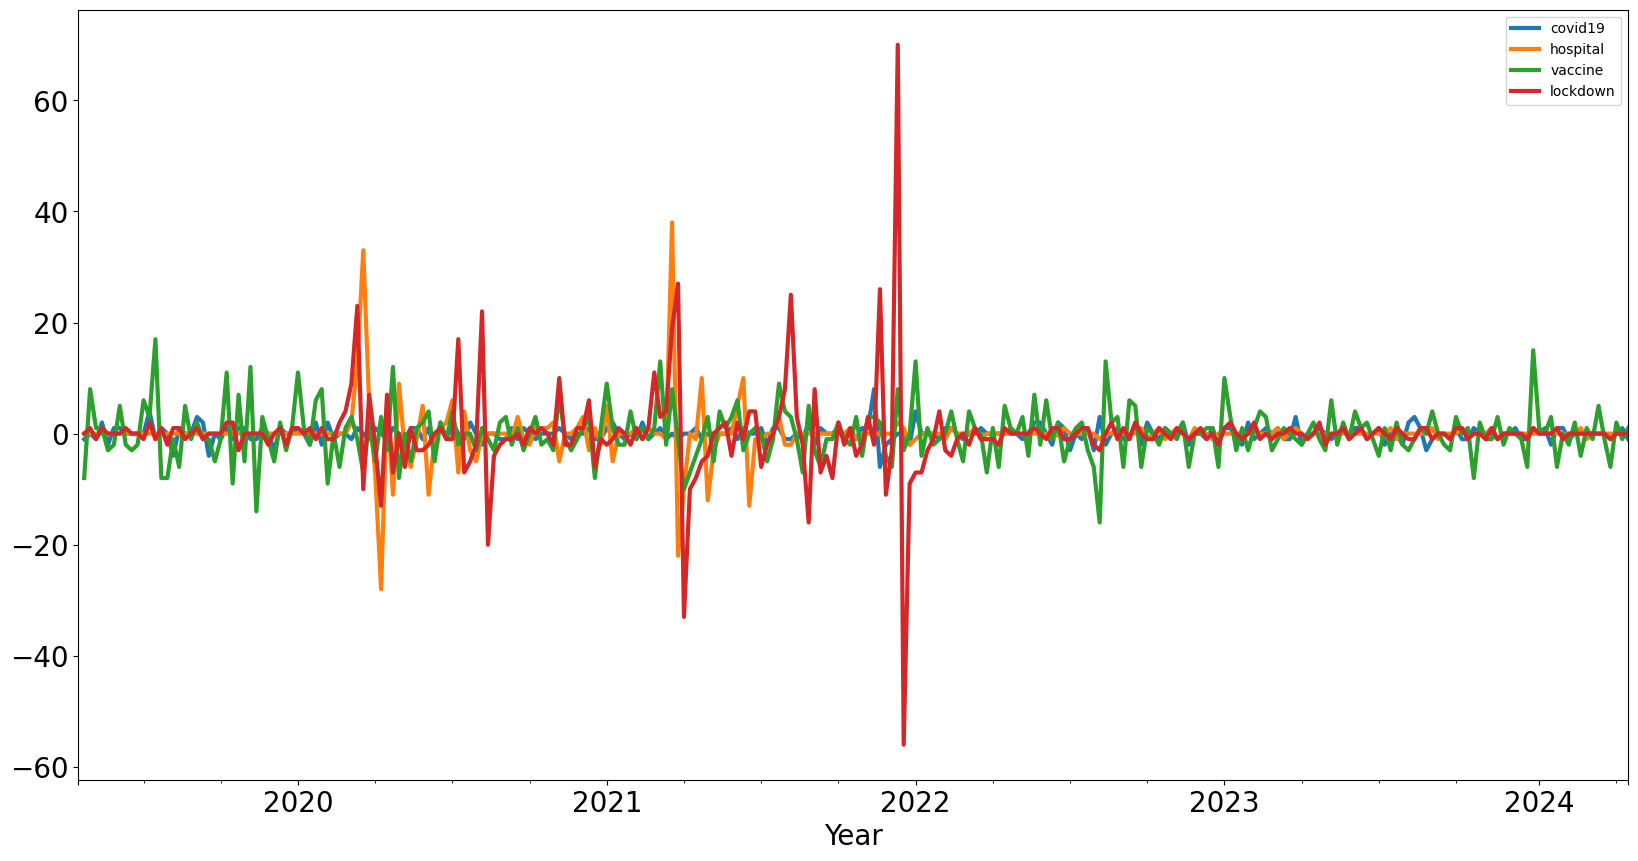

In [21]:
df.diff().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);